# Import Data and Libraries

In [6]:
import datetime
from jdcal import jd2gcal
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import xarray as xr
import geopandas as gpd
from matplotlib import pyplot as plt

import cdsapi
import sklearn_pandas as skp

custom_colors = ['#68A33E', '#A10702', '#FB9E60', '#FFFF82', '#0F0326']

##### 1. Loading raw data #####

input_filename = './Data/FPA_FOD_20170508.sqlite'
conn = sqlite3.connect(input_filename)
query = '''
    SELECT
       *
    FROM
        Fires;
'''
df_raw = pd.read_sql_query(query, conn)




##### 2. Cleaning data and extracting Oregon #####
drop_columns = ['NWCG_REPORTING_AGENCY',
                'NWCG_REPORTING_UNIT_ID',
                'NWCG_REPORTING_UNIT_NAME',
                'FIRE_NAME',
                'COMPLEX_NAME', 
                'OWNER_DESCR',
                'FIRE_SIZE_CLASS',
                'OWNER_CODE']
#df_CA = df_raw[df_raw.STATE == 'CA'].drop(columns=drop_columns)
df_OR = df_raw[df_raw.STATE == 'OR'].drop(columns=drop_columns)
#Extracting onset month and day
df_OR['MONTH'] = df_OR['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[1])
df_OR['DAY'] = df_OR['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[2])

df_freq_mon = df_OR.groupby(['MONTH', 'FIRE_YEAR']).size().unstack()
df_freq_mon.head(10)

FIRE_YEAR,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
MONTH,,,,,,,,,,,,,,,,,,,,,
1,9.0,2.0,4.0,4.0,3.0,1.0,2.0,1.0,NaN,12.0,...,NaN,5.0,1.0,7.0,5.0,2.0,6.0,2.0,23.0,3.0
2,4.0,16.0,4.0,4.0,4.0,2.0,3.0,NaN,1.0,10.0,...,14.0,8.0,6.0,8.0,4.0,8.0,11.0,6.0,5.0,10.0
3,47.0,6.0,41.0,26.0,7.0,5.0,6.0,5.0,10.0,21.0,...,7.0,23.0,5.0,11.0,14.0,1.0,18.0,21.0,19.0,26.0
4,28.0,2.0,31.0,34.0,14.0,19.0,31.0,61.0,41.0,17.0,...,51.0,30.0,31.0,47.0,9.0,10.0,26.0,47.0,42.0,65.0
5,397.0,80.0,135.0,100.0,26.0,110.0,21.0,76.0,72.0,190.0,...,210.0,148.0,76.0,167.0,43.0,37.0,81.0,210.0,86.0,109.0
6,868.0,128.0,195.0,215.0,175.0,162.0,98.0,180.0,185.0,166.0,...,216.0,292.0,343.0,211.0,90.0,78.0,119.0,160.0,199.0,546.0
7,1024.0,225.0,1298.0,737.0,880.0,681.0,985.0,574.0,627.0,1201.0,...,861.0,945.0,517.0,473.0,748.0,323.0,418.0,602.0,1244.0,764.0
8,860.0,554.0,807.0,368.0,1344.0,559.0,832.0,1366.0,618.0,846.0,...,1211.0,579.0,1228.0,844.0,698.0,923.0,471.0,1130.0,1007.0,616.0
9,538.0,365.0,758.0,591.0,263.0,432.0,350.0,355.0,218.0,700.0,...,361.0,323.0,272.0,364.0,203.0,433.0,320.0,304.0,308.0,187.0


In [9]:
df_freq_mon.to_csv("df_freq_mon.csv")

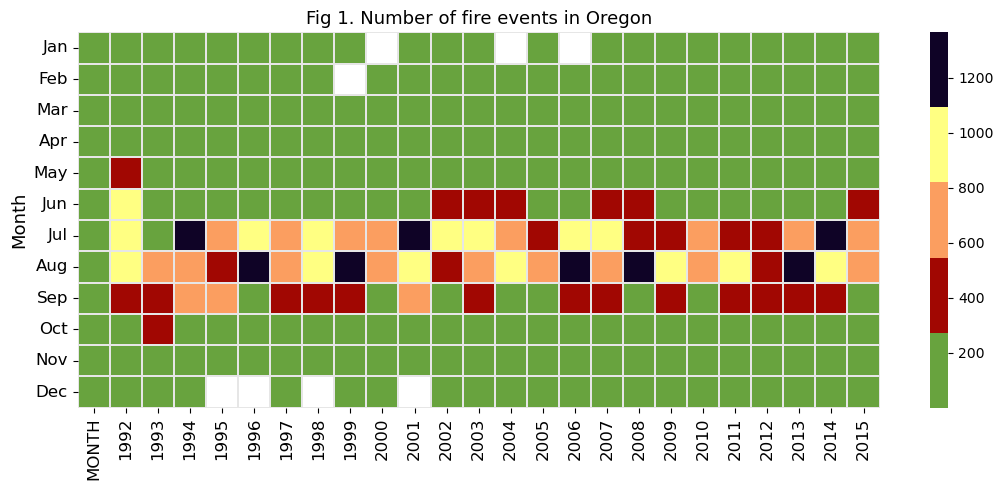

In [12]:
##### 3. Monthly/seasonal fire frequency #####
custom_colors = ['#68A33E', '#A10702', '#FB9E60', '#FFFF82', '#0F0326']
df_freq_mon = pd.read_csv("df_freq_mon.csv")
# plot monthly frequency of fire events
counter_fig = 1
mon_ticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=[11,5])
sns.heatmap(df_freq_mon, cmap=custom_colors, linewidth=.2, linecolor=[.9,.9,.9])
plt.yticks(np.arange(0.5,12.5), labels=mon_ticks, rotation=0, fontsize=12)
plt.xticks(fontsize=12);
plt.xlabel('')
plt.ylabel('Month', fontsize=13)
plt.title(f'Fig {counter_fig}. Number of fire events in Oregon', fontsize=13)
plt.tight_layout()
